# Section 2.2 Tuning Hyperparameters 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd


# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_validate

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def tune_random_forest(X_train, y_train, cv_folds=5):
    """
    Tune hyperparameters for a Random Forest Regressor using GridSearchCV and evaluate the best model.
    
    Parameters:
    - X_train (DataFrame): Training feature set
    - y_train (Series): Training target variable
    - cv_folds (int): Number of cross-validation folds (default is 10)
    
    Returns:
    - best_params_rf (dict): Best hyperparameters for the Random Forest model
    - rf_mean_rmse (float): Mean RMSE for the best model after cross-validation
    - rf_std_rmse (float): Standard deviation of RMSE for the best model after cross-validation
    """

    # Define the parameter grid for Random Forest
    rf_param_grid = {
        'n_estimators': [50,100,200],    # Number of trees in the forest
        'max_depth': [10, 20],       # Maximum depth of each tree
        'min_samples_split': [2, 5],   # Minimum samples required to split a node
        'min_samples_leaf': [1, 2]     # Minimum samples required at a leaf node
    }
    
      
    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)
    
    # Perform grid search
    rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv_folds, 
                                  scoring='neg_root_mean_squared_error', 
                                  return_train_score=True, n_jobs=2)
    rf_grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params_rf = rf_grid_search.best_params_
    best_score_rf = -rf_grid_search.best_score_
    
    # Perform cross-validation for the best Random Forest model
    rf_best_model = rf_grid_search.best_estimator_
    cv_results_rf = cross_validate(rf_best_model, X_train, y_train, cv=cv_folds, 
                                   scoring='neg_root_mean_squared_error', return_train_score=True)
    
    rf_mean_rmse = -np.mean(cv_results_rf['test_score'])
    rf_std_rmse = np.std(cv_results_rf['test_score'])
    
    return best_params_rf, rf_mean_rmse, rf_std_rmse

In [4]:
# Helper function to run tuning on all training datasets
def run_tuning_on_datasets(x_files, y_files, label):
    results = []
    for x_file, y_file in zip(x_files, y_files):
        # Load datasets
        X_train = pd.read_csv(x_file)
        y_train = pd.read_csv(y_file).squeeze()
        
        # Call the tuning function
        best_params, mean_rmse, std_rmse = tune_random_forest(X_train, y_train)
        
        # Store results
        result = {
            'Model': x_file.split('/')[-1].split('_')[-1].split('.')[0], 
            'Best Params': best_params,
            'Mean RMSE': mean_rmse,
            'Std RMSE': std_rmse
        }
        results.append(result)
        print(f"Results for {label} : {result}")
        print('')
    return results

In [5]:
# Define the paths to the training datasets  

fso_train_files = [
    "Data/Splitting/Feature_Selection/train_X_FSO_Generic.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific0.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific3.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific4.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific5.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific6.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific7.csv",
    "Data/Splitting/Feature_Selection/train_X_FSO_Specific8.csv"
]

rf_train_files = [
    "Data/Splitting/feature_selection/train_X_RF_Generic.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific0.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific3.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific4.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific5.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific6.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific7.csv",
    "Data/Splitting/feature_selection/train_X_RF_Specific8.csv"
]

y_fso_train_files = [
    "Data/Splitting/Generic/y_train_FSO.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_0.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_3.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_4.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_5.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_6.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_7.csv",
    "Data/Splitting/Specific/train_y_FSO_SC_8.csv"
]

y_rf_train_files = [
    "Data/Splitting/Generic/y_train_RF.csv",
    "Data/Splitting/Specific/train_y_RF_SC_0.csv",
    "Data/Splitting/Specific/train_y_RF_SC_3.csv",
    "Data/Splitting/Specific/train_y_RF_SC_4.csv",
    "Data/Splitting/Specific/train_y_RF_SC_5.csv",
    "Data/Splitting/Specific/train_y_RF_SC_6.csv",
    "Data/Splitting/Specific/train_y_RF_SC_7.csv",
    "Data/Splitting/Specific/train_y_RF_SC_8.csv"
]

**(1) Model Training and Hyperparameter Tuning for FSO Attenuation**

In [6]:
# Run tuning for FSO datasets
fso_train_results = run_tuning_on_datasets(fso_train_files, y_fso_train_files, "FSO")

Results for FSO : {'Model': 'Generic', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 1.156509989495212, 'Std RMSE': 0.023851243452861333}

Results for FSO : {'Model': 'Specific0', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 1.0351162922651647, 'Std RMSE': 0.021299511539921403}

Results for FSO : {'Model': 'Specific3', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, 'Mean RMSE': 2.502659466561245, 'Std RMSE': 0.403948253262437}

Results for FSO : {'Model': 'Specific4', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, 'Mean RMSE': 0.9301614841249082, 'Std RMSE': 0.2490842478108137}

Results for FSO : {'Model': 'Specific5', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 1.125881465

In [7]:
# Separate the generic model from specific models in results
generic_fso_model = fso_train_results[0]  
specific_fso_models = fso_train_results[1:]  # The rest are Specific models

**(2) Model Training and Hyperparameter Tuning for RF Attenuation**

In [8]:
# Run tuning for RF datasets
rf_train_results = run_tuning_on_datasets(rf_train_files, y_rf_train_files, "RF")

Results for RF : {'Model': 'Generic', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 0.7688464609834371, 'Std RMSE': 0.023027136559051004}

Results for RF : {'Model': 'Specific0', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 0.48704458150351143, 'Std RMSE': 0.05695468574529704}

Results for RF : {'Model': 'Specific3', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, 'Mean RMSE': 0.44759733700491955, 'Std RMSE': 0.08996189922279615}

Results for RF : {'Model': 'Specific4', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 0.4379927680085551, 'Std RMSE': 0.10894229489507258}

Results for RF : {'Model': 'Specific5', 'Best Params': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, 'Mean RMSE': 0.705137

In [9]:
# Separate the generic model from specific models in results
generic_rf_model = rf_train_results[0] 
specific_rf_models = rf_train_results[1:]  # The rest are Specific models

**(3) Validation Set Evaluation for the Specific Model**

In [10]:
# Define the paths to the validation datasets for FSO and RF
fso_val_files = [
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific0.csv",
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific3.csv",
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific4.csv",
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific5.csv",
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific6.csv",
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific7.csv",
    "Data/Splitting/Feature_Selection/val_X_FSO_Specific8.csv"
]

rf_val_files = [
    "Data/Splitting/feature_selection/val_X_RF_Specific0.csv",
    "Data/Splitting/feature_selection/val_X_RF_Specific3.csv",
    "Data/Splitting/feature_selection/val_X_RF_Specific4.csv",
    "Data/Splitting/feature_selection/val_X_RF_Specific5.csv",
    "Data/Splitting/feature_selection/val_X_RF_Specific6.csv",
    "Data/Splitting/feature_selection/val_X_RF_Specific7.csv",
    "Data/Splitting/feature_selection/val_X_RF_Specific8.csv"
]

# Define paths for FSO and RF validation target variables
y_fso_val_files = [
    "Data/Splitting/Specific/val_y_FSO_SC_0.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_3.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_4.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_5.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_6.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_7.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_8.csv"
]

y_rf_val_files = [
    "Data/Splitting/Specific/val_y_RF_SC_0.csv",
    "Data/Splitting/Specific/val_y_RF_SC_3.csv",
    "Data/Splitting/Specific/val_y_RF_SC_4.csv",
    "Data/Splitting/Specific/val_y_RF_SC_5.csv",
    "Data/Splitting/Specific/val_y_RF_SC_6.csv",
    "Data/Splitting/Specific/val_y_RF_SC_7.csv",
    "Data/Splitting/Specific/val_y_RF_SC_8.csv"
]

In [11]:
weather_conditions = {
    "Specific0": "Clear Weather",
    "Specific3": "Dust Storm",
    "Specific4": "Fog",
    "Specific5": "Drizzle",
    "Specific6": "Rain",
    "Specific7": "Snow",
    "Specific8": "Showers"
}

In [12]:
# Function to evaluate specific models on corresponding validation sets
def evaluate_specific_models(specific_models, x_val_files, y_val_files, label):
    results = []
    plt.figure(figsize=(10, 6))

    for model_info, x_val_file, y_val_file in zip(specific_models, x_val_files, y_val_files):
        # Load validation data
        X_val = pd.read_csv(x_val_file)
        y_val = pd.read_csv(y_val_file).squeeze()

        # Initialize model with the best parameters
        best_params = model_info['Best Params']
        model = RandomForestRegressor(random_state=42, **best_params)
        model.fit(X_val, y_val)  # Train model on the training set

        # Predict on validation set
        y_pred = model.predict(X_val)

        # Calculate RMSE and R²
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Print results
        model_name = model_info['Model']
        model_name = weather_conditions.get(model_name, model_name)
        
        print(f"{label} Specific Model: {model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

        # Store results
        results.append({'Model': model_name, 'RMSE': rmse, 'R2': r2})
        
        
        # Plot the results for this model in a separate figure
        plt.figure(figsize=(15, 6))
        plt.style.use('seaborn-v0_8-paper')
        
        plt.scatter(y_val, y_pred, label=f'{model_name} (RMSE: {rmse:.2f}, R²: {r2:.2f})')
        plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label='Perfect Fit')

        plt.xlabel(f"Actual {label} Att. (dB)", fontsize=14)
        plt.ylabel(f"Predicted {label} Att. (dB)", fontsize=14)
    
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.savefig(f'Figure/eps/Evaluation/specific_{label}_{model_name}_randomforest.eps', format='eps')
        plt.show()


    return results

**For FSO Attenuation**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Clear Weather - RMSE: 0.4390, R²: 0.9841


<Figure size 1000x600 with 0 Axes>

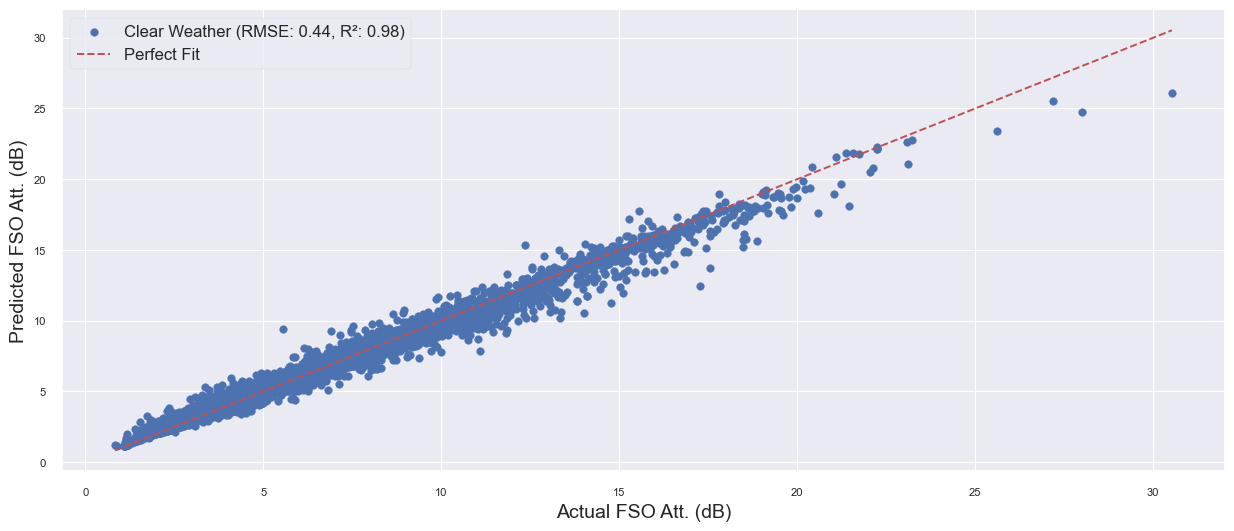

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Dust Storm - RMSE: 1.5737, R²: 0.9548


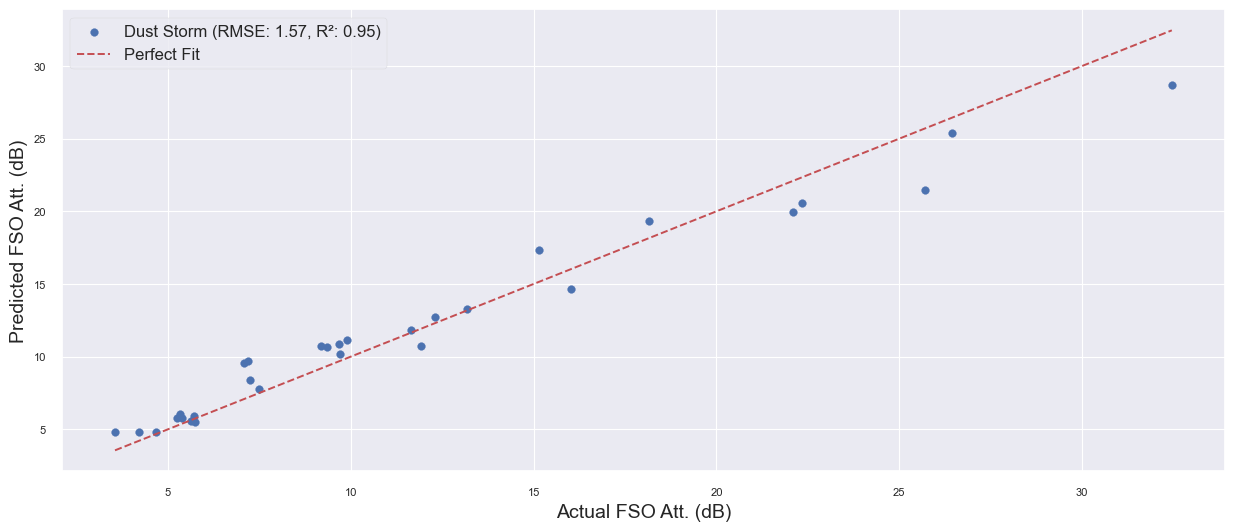

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Fog - RMSE: 0.3250, R²: 0.9944


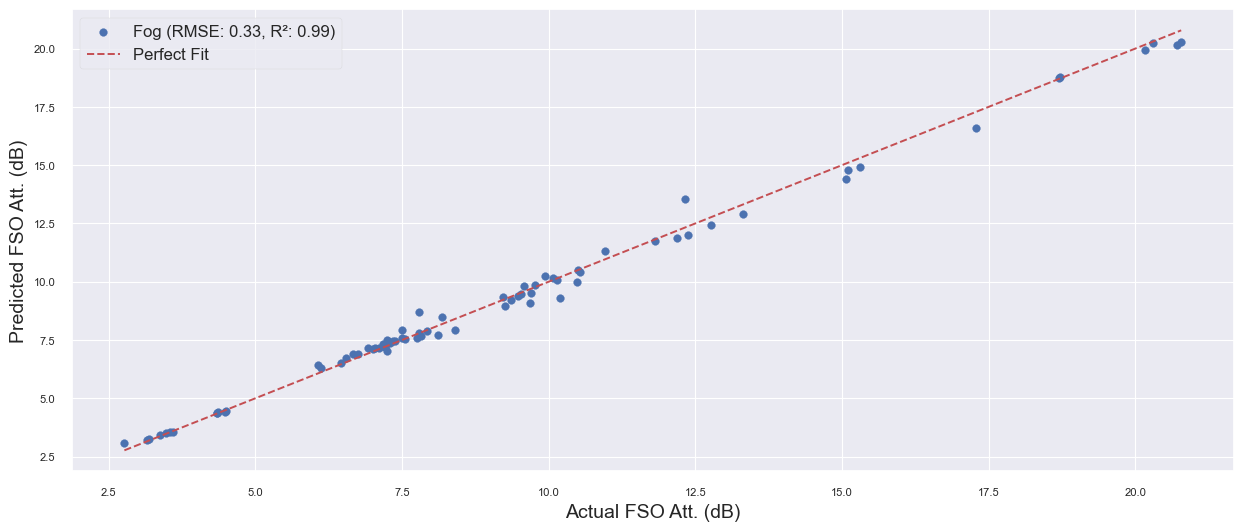

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Drizzle - RMSE: 0.4513, R²: 0.9834


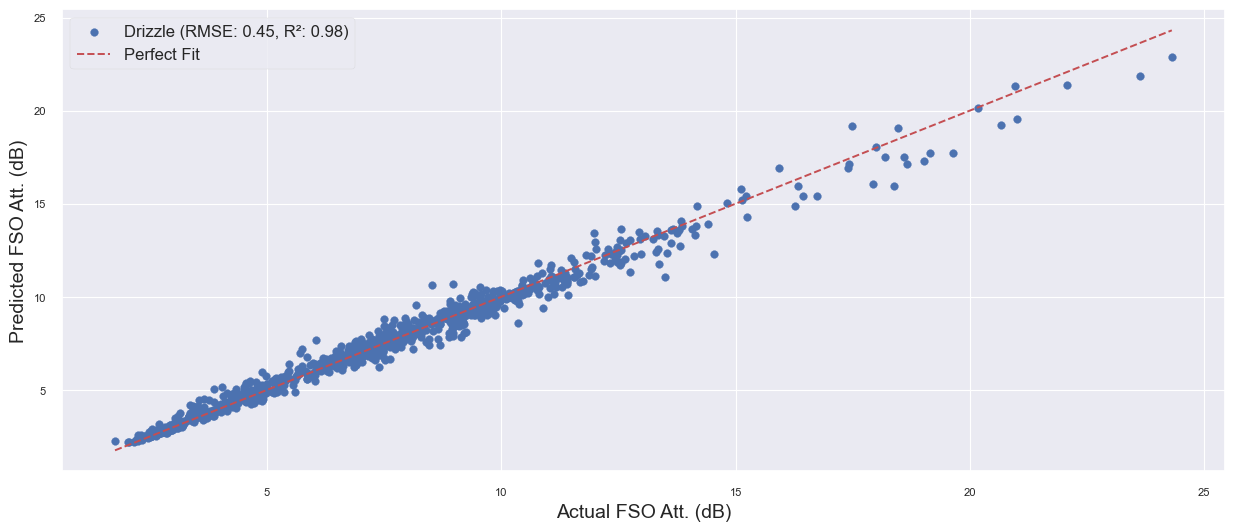

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Rain - RMSE: 0.5222, R²: 0.9844


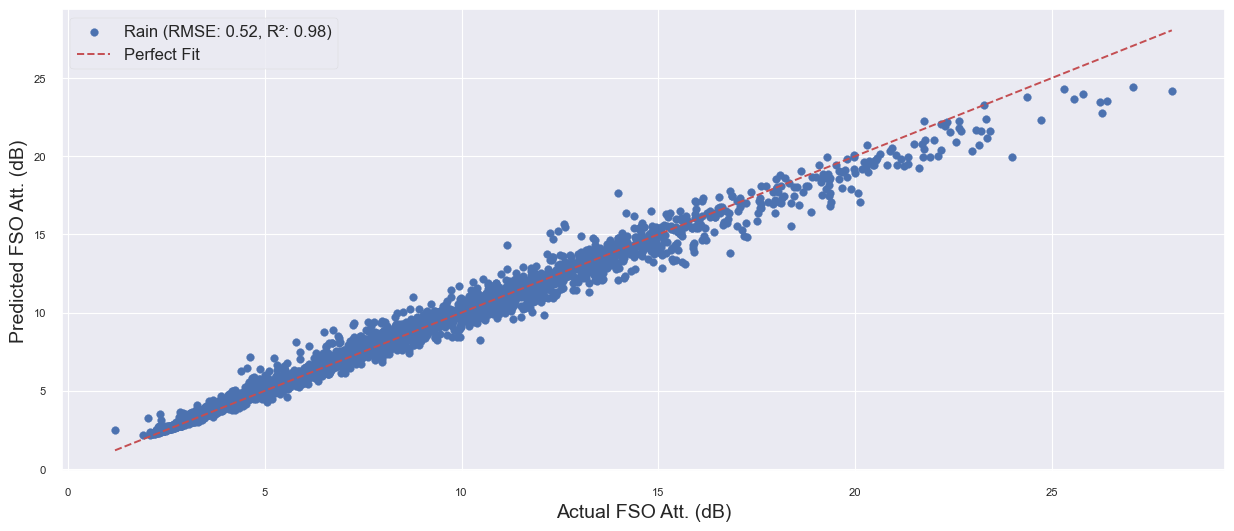

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Snow - RMSE: 0.7271, R²: 0.9781


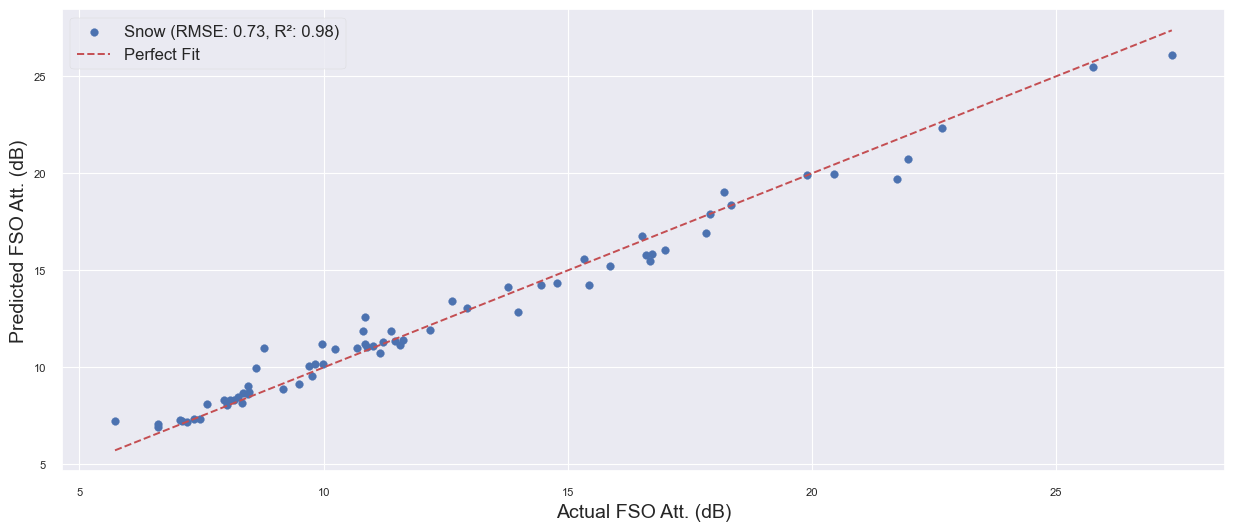

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Specific Model: Showers - RMSE: 0.7156, R²: 0.9713


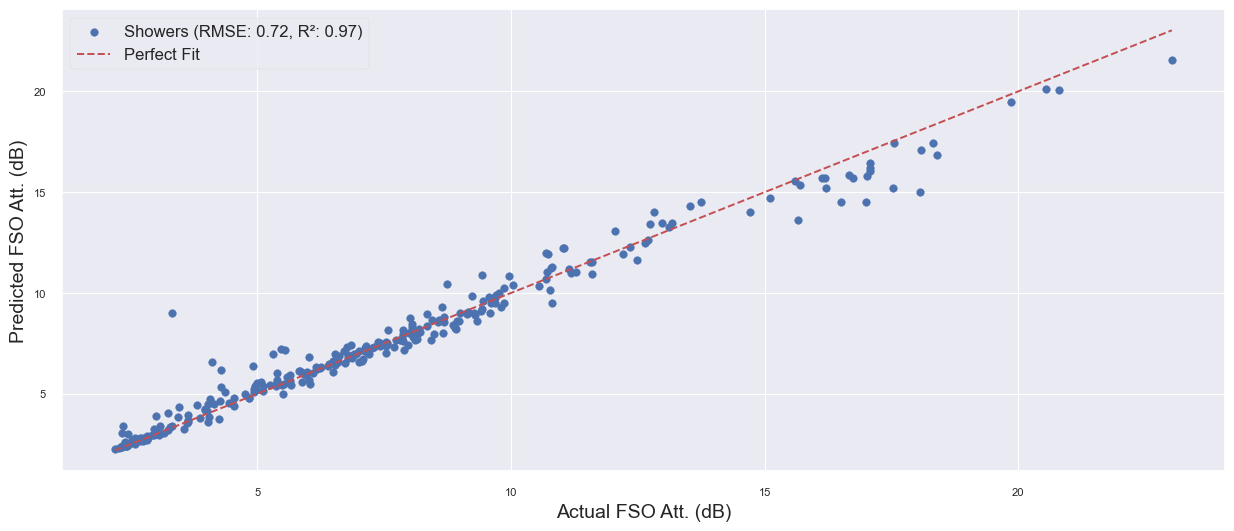

In [13]:
# Evaluate FSO Specific models on their corresponding validation sets
specific_fso_results = evaluate_specific_models(specific_fso_models, fso_val_files, y_fso_val_files, "FSO")

**For RF Attenuation**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Clear Weather - RMSE: 0.2147, R²: 0.9931


<Figure size 1000x600 with 0 Axes>

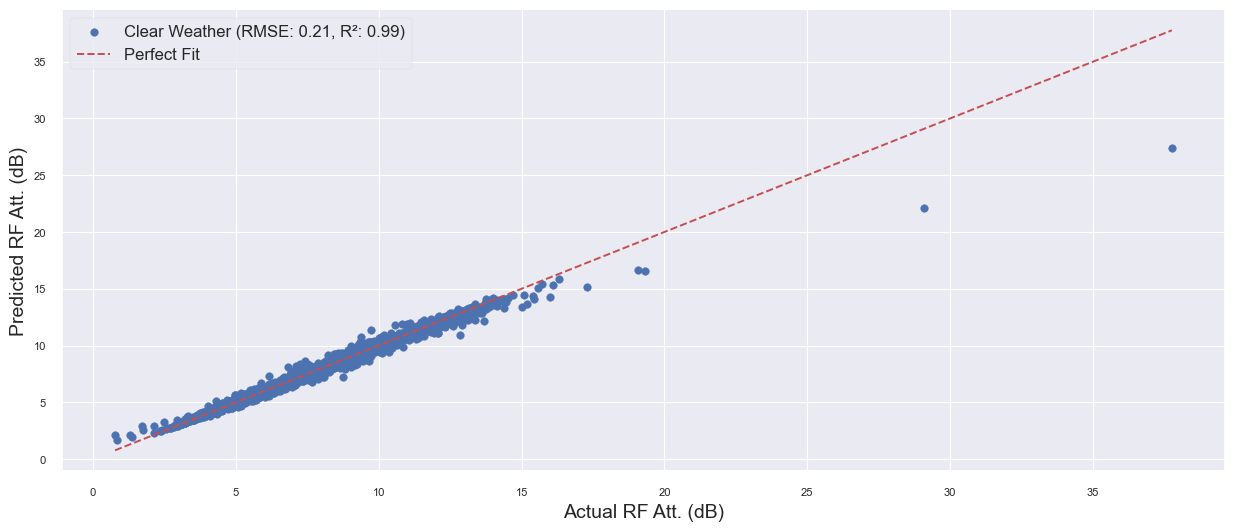

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Dust Storm - RMSE: 0.3463, R²: 0.9883


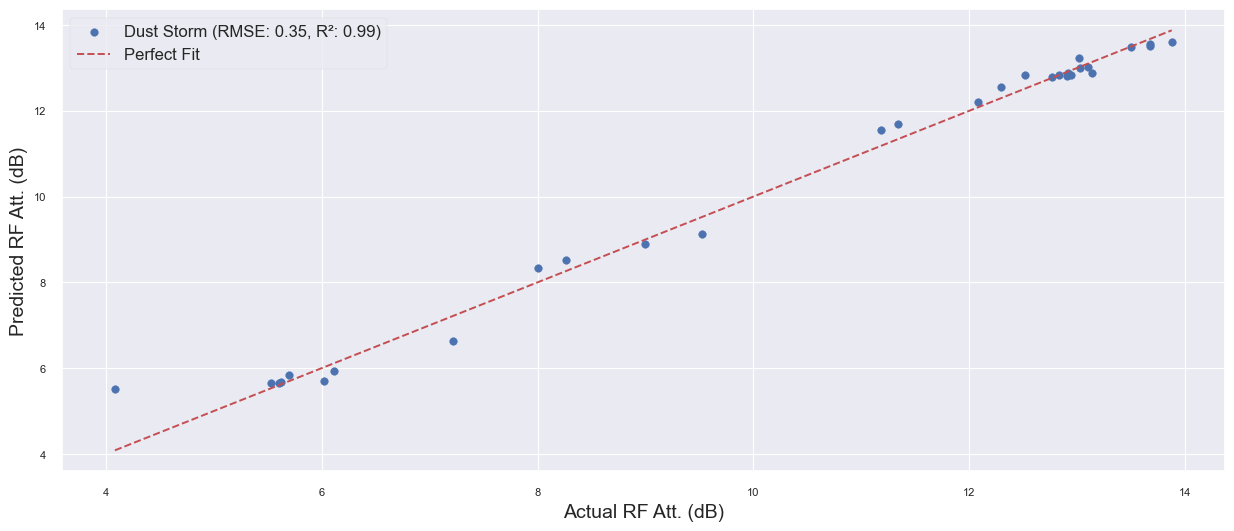

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Fog - RMSE: 0.3267, R²: 0.9755


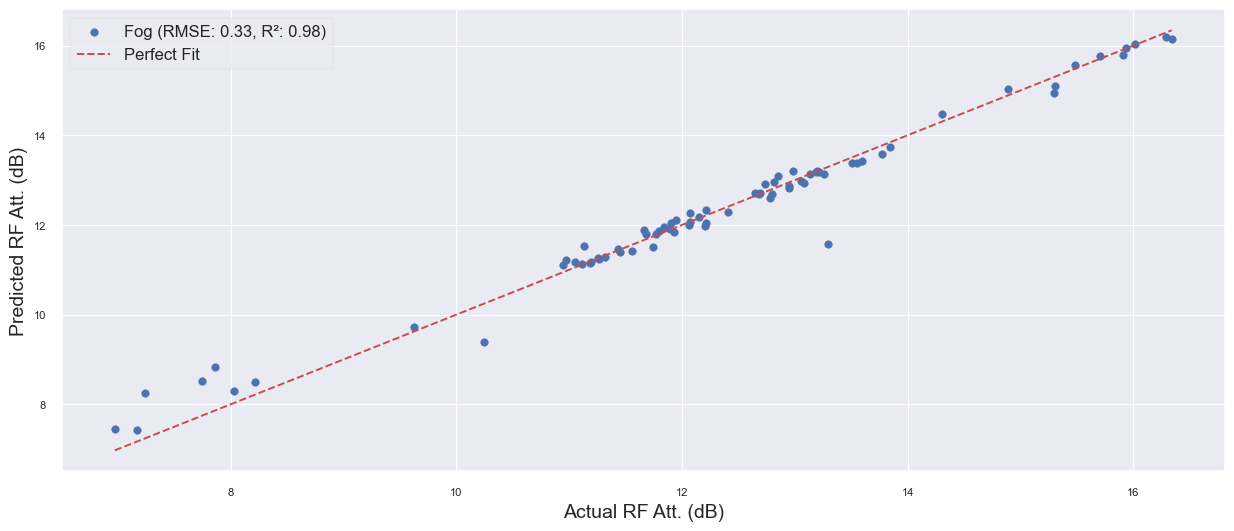

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Drizzle - RMSE: 0.3215, R²: 0.9880


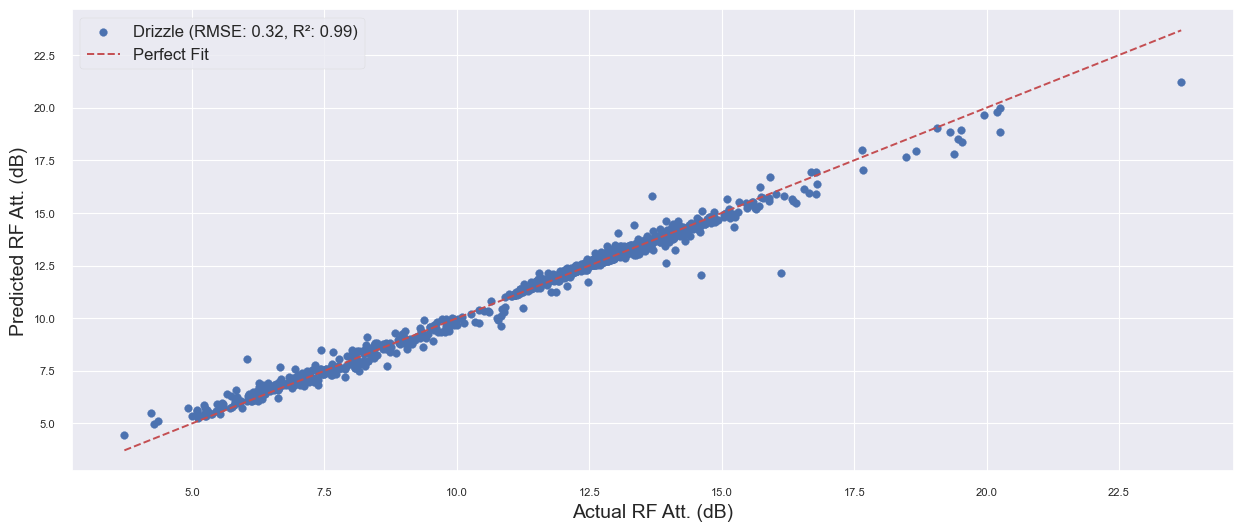

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Rain - RMSE: 0.4453, R²: 0.9880


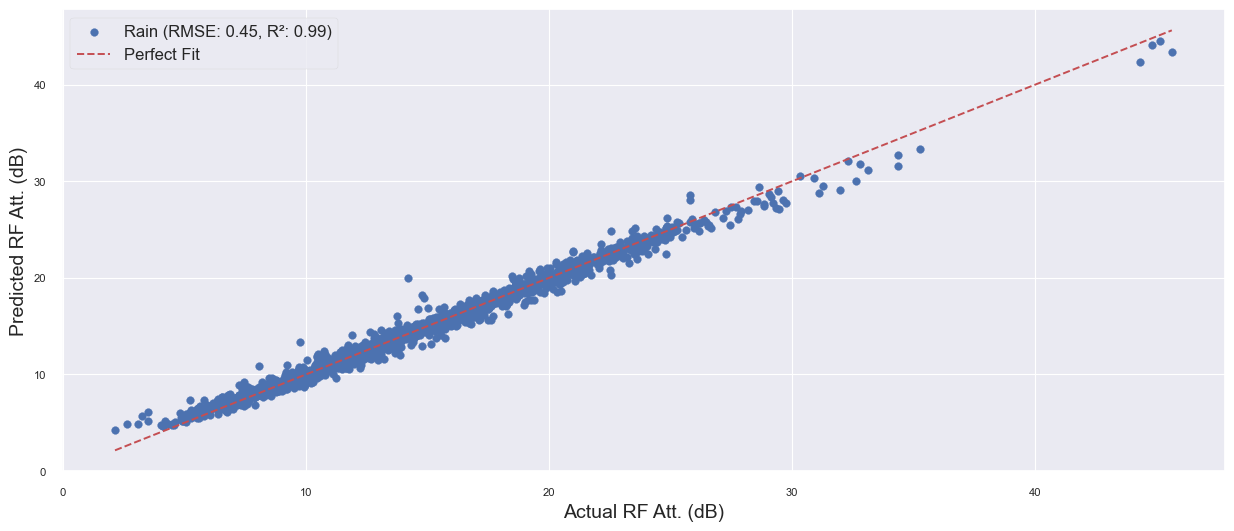

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Snow - RMSE: 0.2541, R²: 0.9683


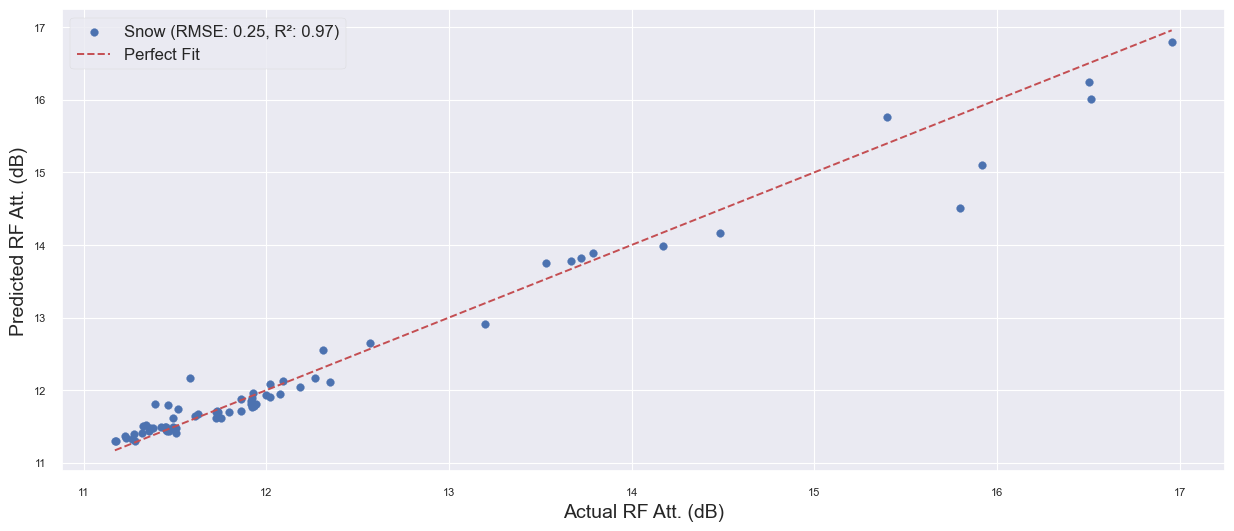

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Specific Model: Showers - RMSE: 0.7326, R²: 0.9503


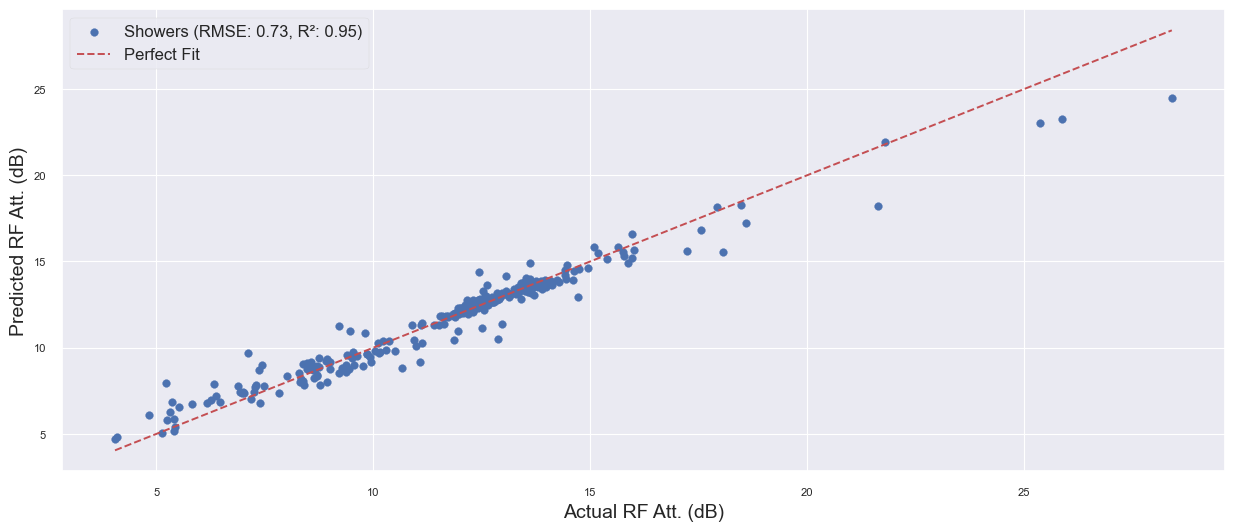

In [14]:
# Evaluate RF Specific models on their corresponding validation sets
specific_rf_results = evaluate_specific_models(specific_rf_models, rf_val_files, y_rf_val_files, "RF")

**(4) Validation Set Evaluation for the Generic Model**

In [15]:
# Define the paths to the validation datasets for FSO and RF
fso_gv_files = [
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Generic.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific0.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific3.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific4.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific5.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific6.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific7.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_FSO_Specific8.csv"
]

rf_gv_files = [
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Generic.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific0.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific3.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific4.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific5.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific6.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific7.csv",
    "Data/Splitting/Feature_Selection/Generic_Validation/X_RF_Specific8.csv"
]


# Define paths for FSO and RF validation target variables
y_fso_gv_files = [
    "Data/Splitting/Generic/y_val_FSO.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_0.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_3.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_4.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_5.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_6.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_7.csv",
    "Data/Splitting/Specific/val_y_FSO_SC_8.csv"
]

y_rf_gv_files = [
    "Data/Splitting/Generic/y_val_RF.csv",
    "Data/Splitting/Specific/val_y_RF_SC_0.csv",
    "Data/Splitting/Specific/val_y_RF_SC_3.csv",
    "Data/Splitting/Specific/val_y_RF_SC_4.csv",
    "Data/Splitting/Specific/val_y_RF_SC_5.csv",
    "Data/Splitting/Specific/val_y_RF_SC_6.csv",
    "Data/Splitting/Specific/val_y_RF_SC_7.csv",
    "Data/Splitting/Specific/val_y_RF_SC_8.csv"
]

In [16]:
# Function to evaluate a model on multiple validation sets
def evaluate_generic_model(generic_model, x_val_files, y_val_files, label):
    results = []
    plt.figure(figsize=(10, 6))

    for x_val_file, y_val_file in zip(x_val_files, y_val_files):
        # Load validation data
        X_val = pd.read_csv(x_val_file)
        y_val = pd.read_csv(y_val_file).squeeze()
       

        # Initialize model with the best parameters
        best_params = generic_model['Best Params']
        model = RandomForestRegressor(random_state=42, **best_params)
        model.fit(X_val, y_val)  # Train model on the training set

        # Predict on validation set
        y_pred = model.predict(X_val)

        # Calculate RMSE and R²
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Print results
        model_name = x_val_file.split('/')[-1].split('_')[-1].split('.')[0]
        model_name = weather_conditions.get(model_name, model_name)
        
        print(f"{label} Generic Model: {model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

        # Store results
        results.append({'Model': model_name, 'RMSE': rmse, 'R2': r2})

        
        # Plot the results for this model in a separate figure
        plt.figure(figsize=(15, 6))
        plt.style.use('seaborn-v0_8-paper')
        
        plt.scatter(y_val, y_pred, label=f'{model_name} (RMSE: {rmse:.2f}, R²: {r2:.2f})')
        plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', label='Perfect Fit')

        plt.xlabel(f"Actual {label} Att. (dB)", fontsize=14)
        plt.ylabel(f"Predicted {label} Att. (dB)", fontsize=14)
    
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.savefig(f'Figure/eps/Evaluation/Generic_{label}_{model_name}_randomforest.eps', format='eps')
        plt.show()

        
    return results

**For FSO Attenuation**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Generic - RMSE: 0.5000, R²: 0.9830


<Figure size 1000x600 with 0 Axes>

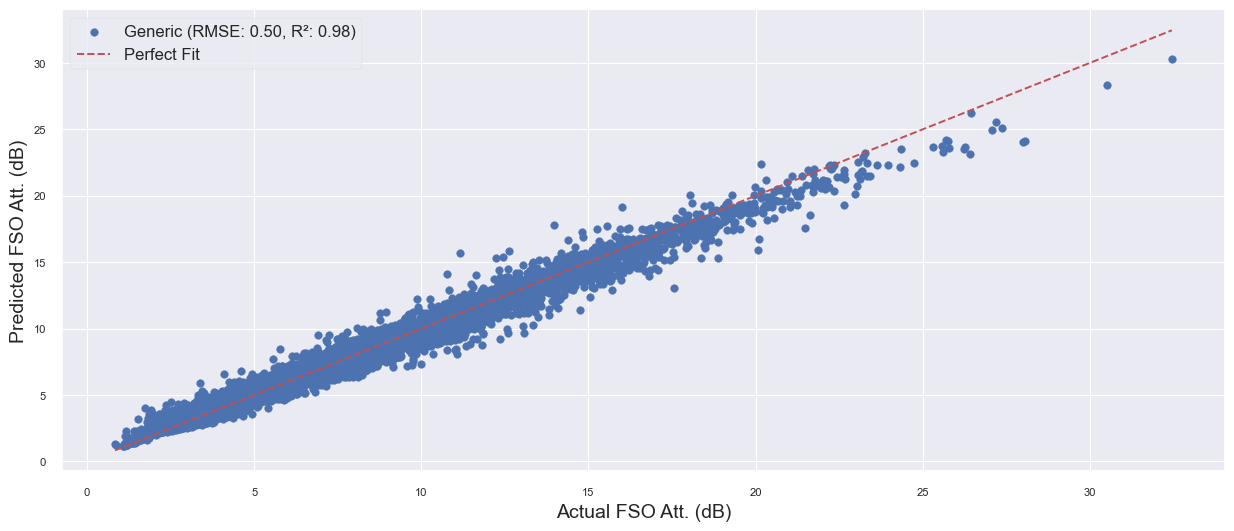

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Clear Weather - RMSE: 0.4737, R²: 0.9815


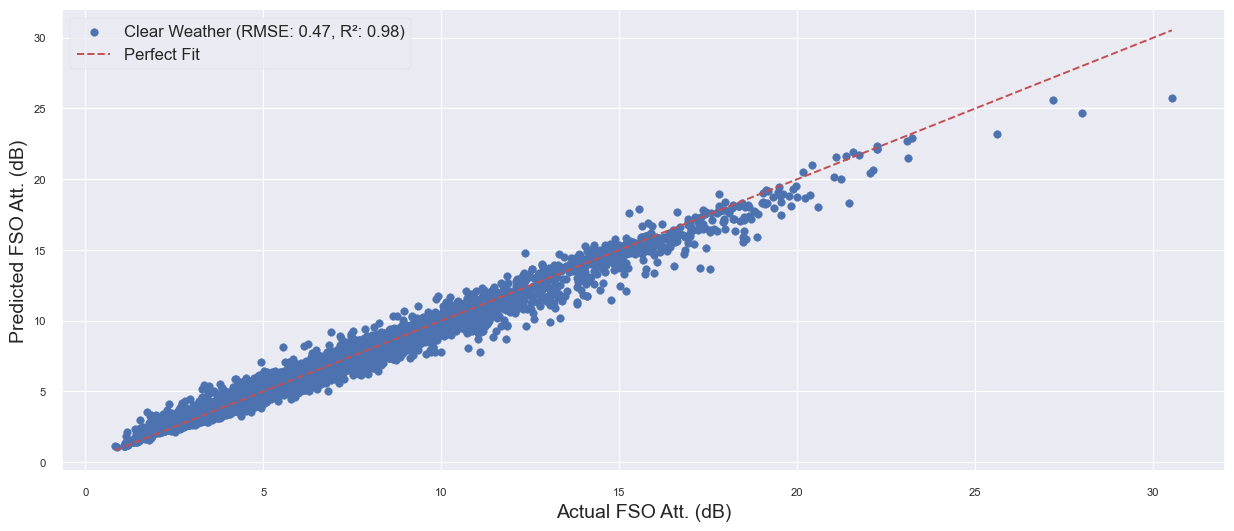

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Dust Storm - RMSE: 1.9311, R²: 0.9320


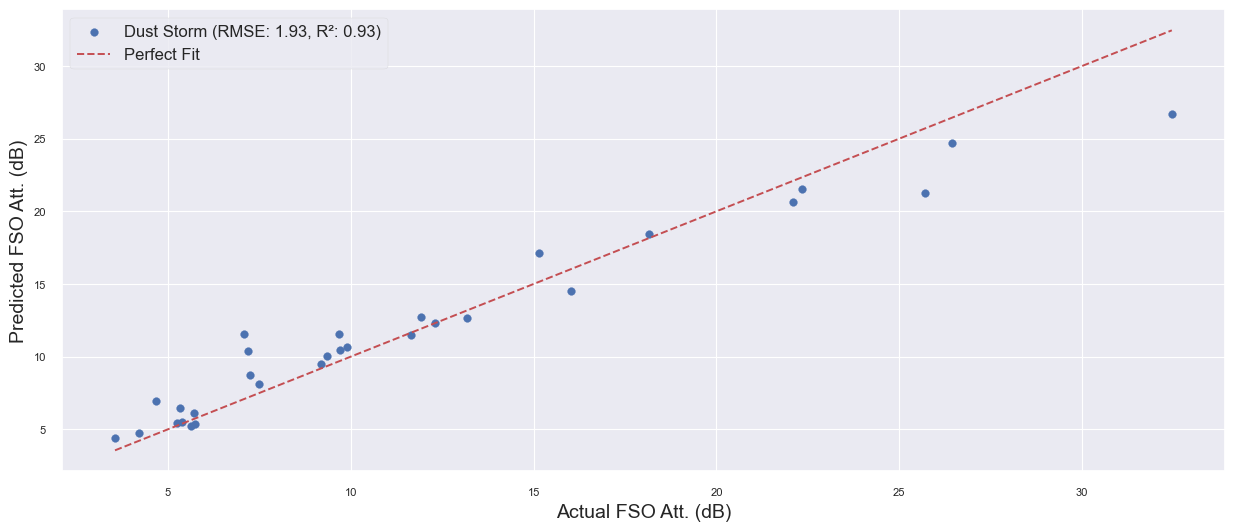

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Fog - RMSE: 0.3572, R²: 0.9933


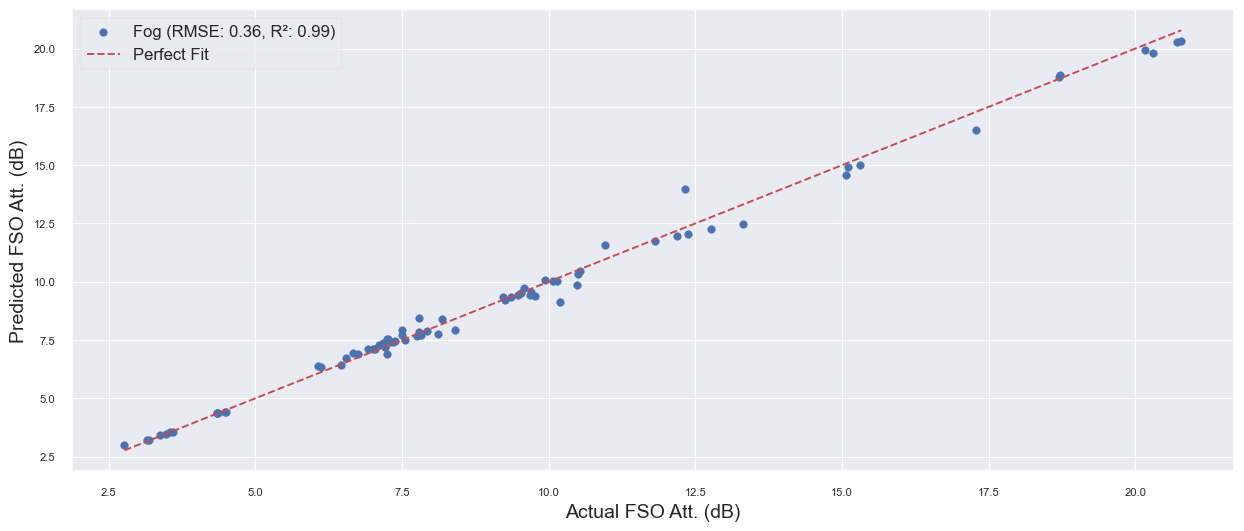

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Drizzle - RMSE: 0.4533, R²: 0.9833


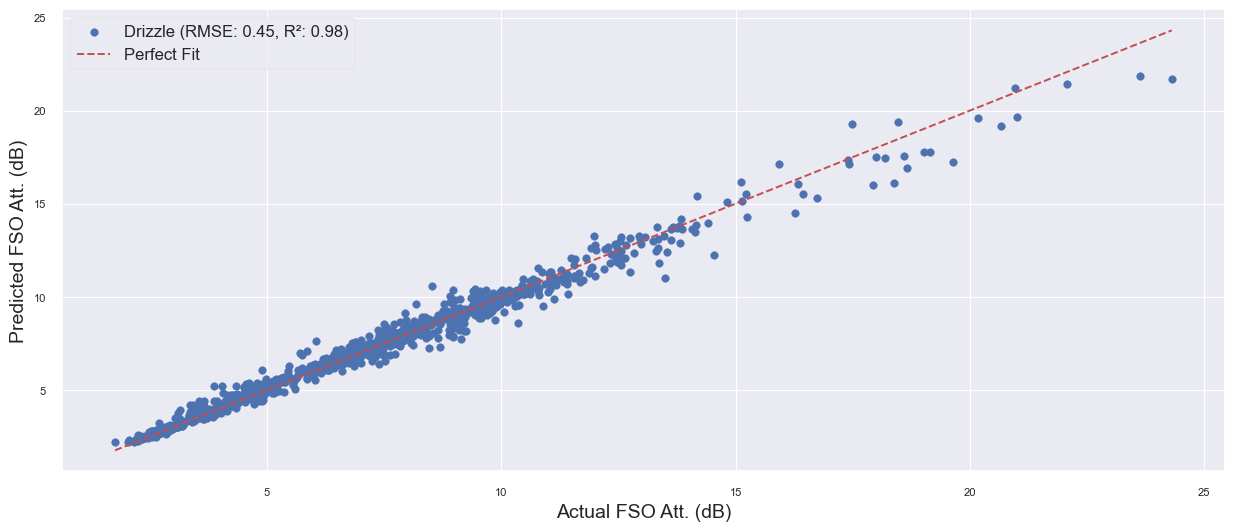

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Rain - RMSE: 0.5215, R²: 0.9845


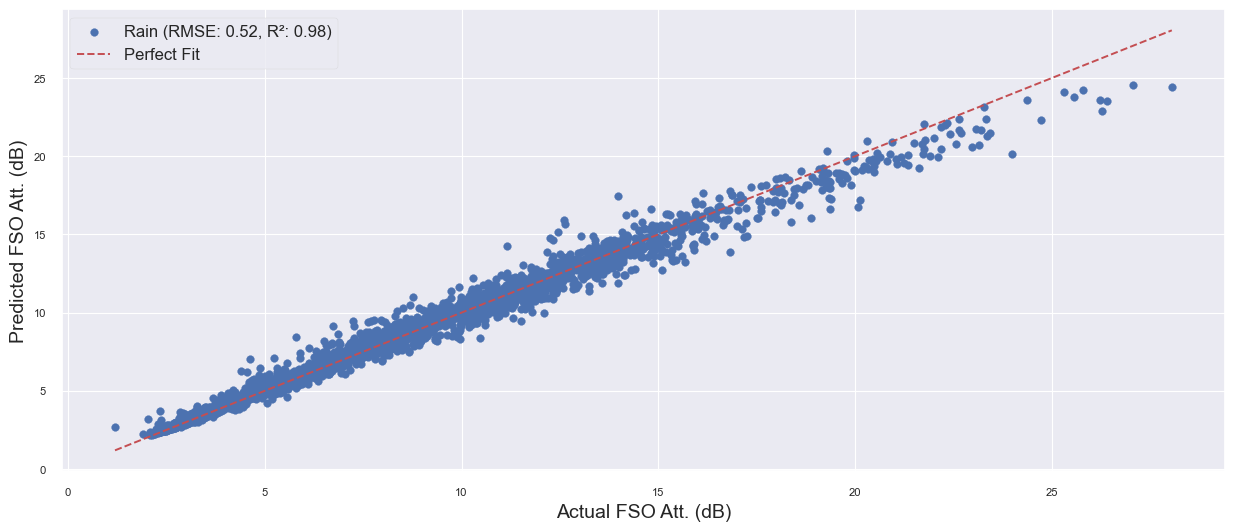

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Snow - RMSE: 0.7917, R²: 0.9740


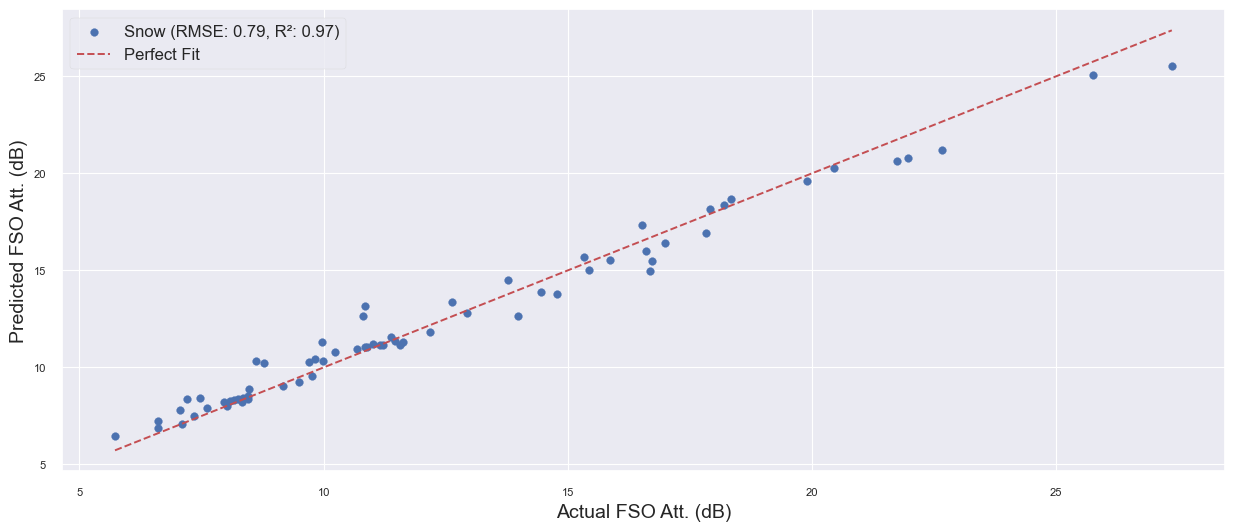

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FSO Generic Model: Showers - RMSE: 0.6452, R²: 0.9767


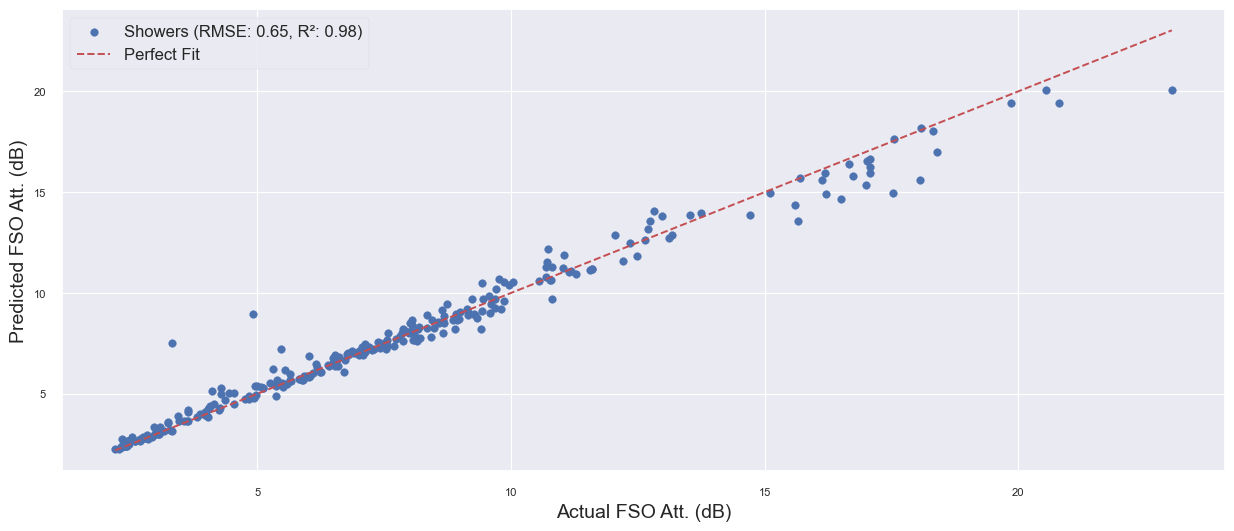

In [17]:
# Evaluate the FSO Generic model on all validation sets
generic_fso_results = evaluate_generic_model(generic_fso_model, fso_gv_files, y_fso_gv_files, "FSO")

**For FSO Attenuation**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Generic - RMSE: 0.3369, R²: 0.9906


<Figure size 1000x600 with 0 Axes>

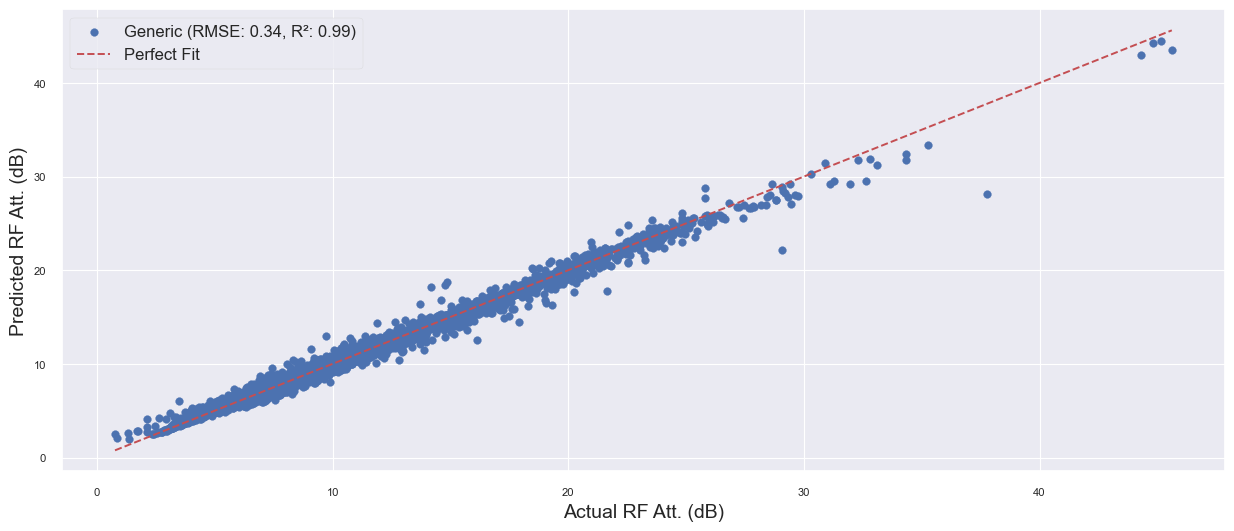

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Clear Weather - RMSE: 0.2624, R²: 0.9897


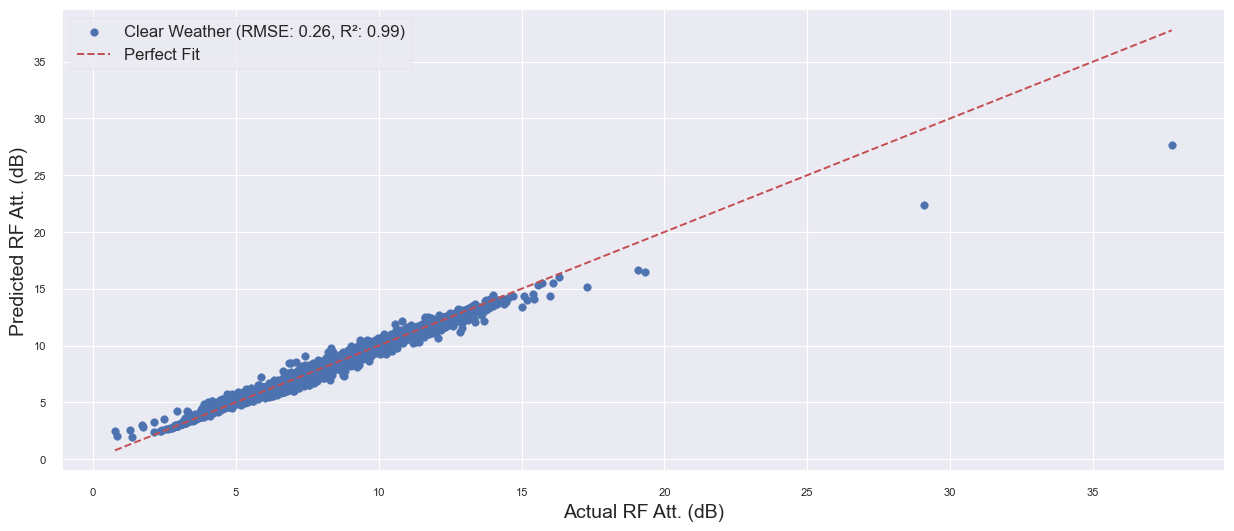

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Dust Storm - RMSE: 0.3859, R²: 0.9854


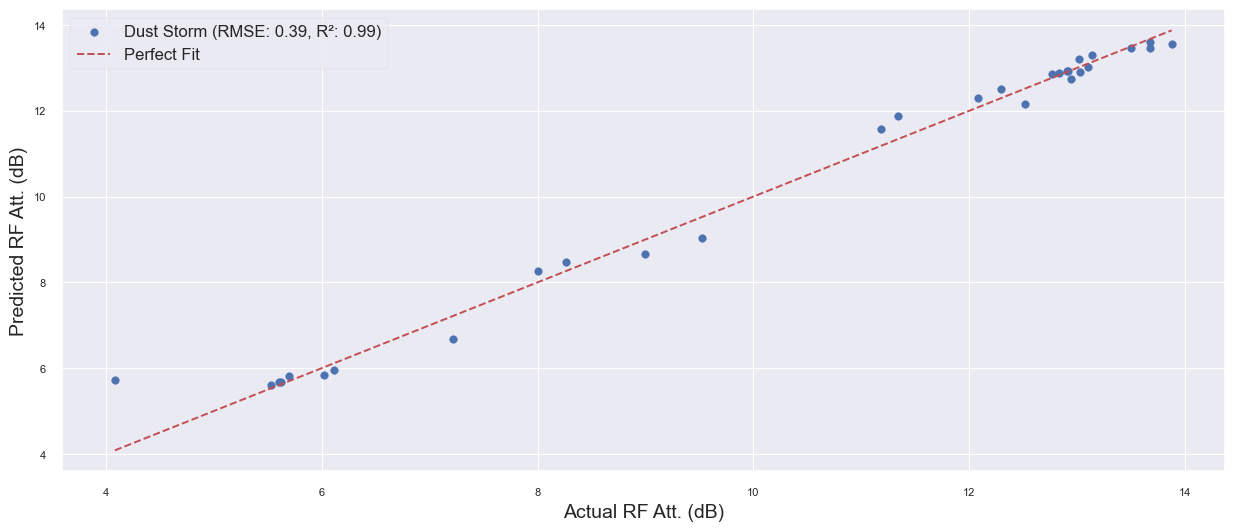

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Fog - RMSE: 0.3498, R²: 0.9719


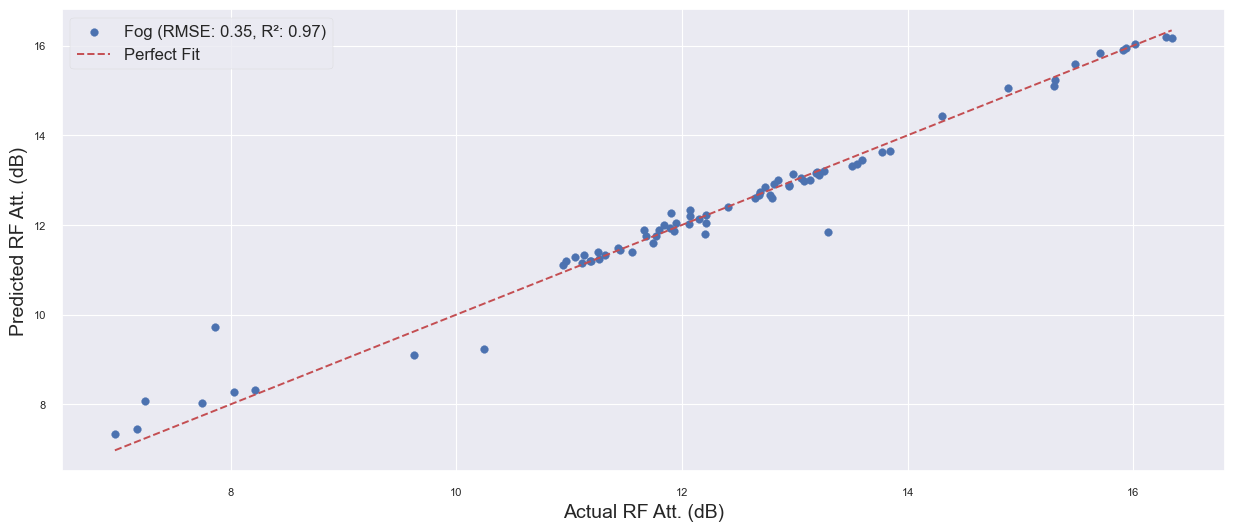

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Drizzle - RMSE: 0.3376, R²: 0.9867


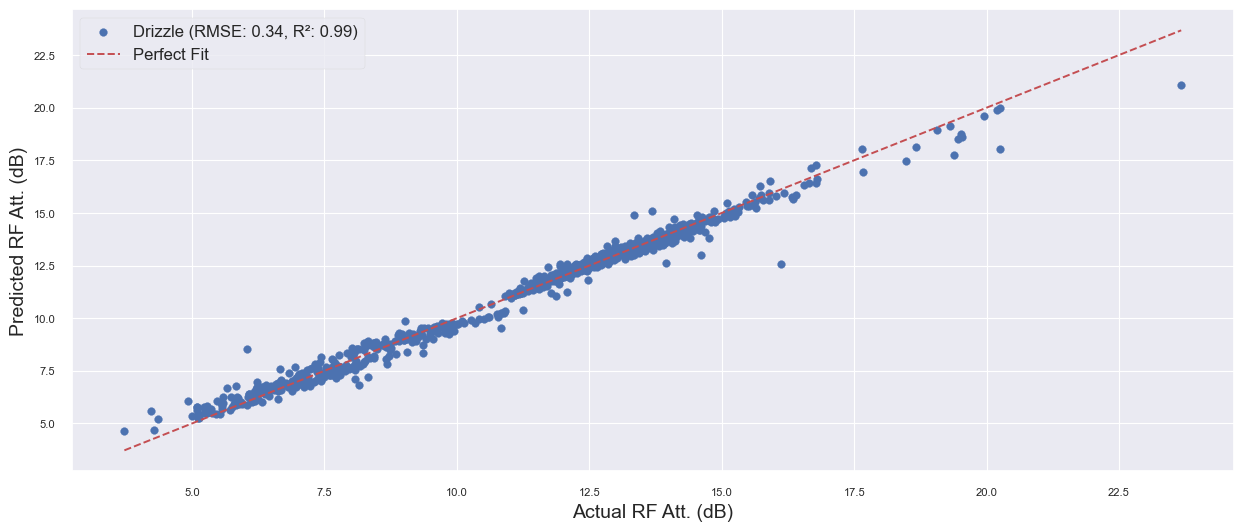

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Rain - RMSE: 0.4456, R²: 0.9880


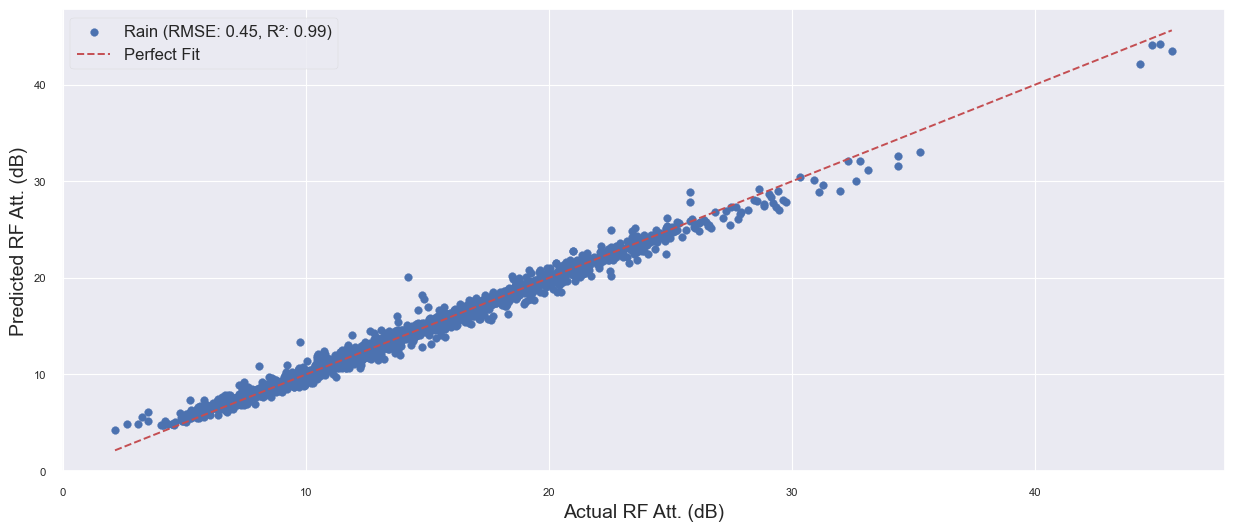

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Snow - RMSE: 0.2559, R²: 0.9678


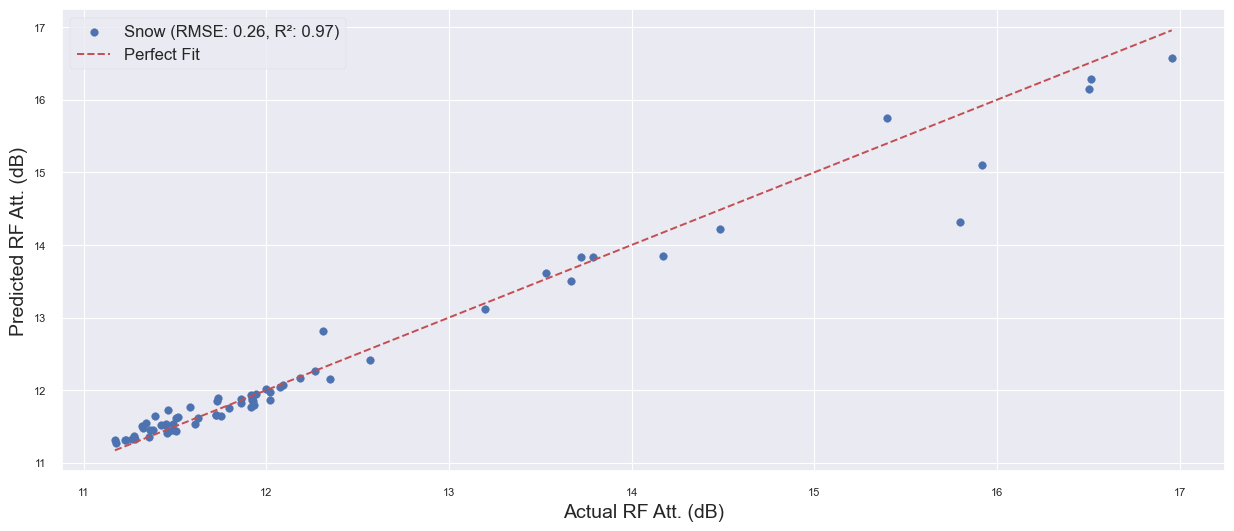

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


RF Generic Model: Showers - RMSE: 0.5339, R²: 0.9736


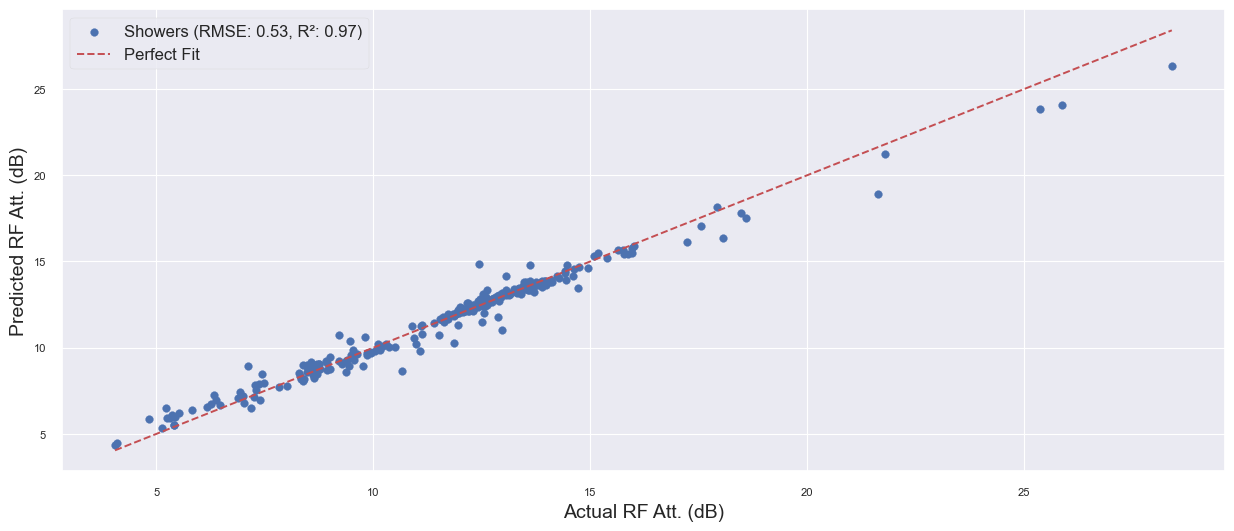

In [18]:
# Evaluate the RF Generic model on all validation sets
generic_rf_results = evaluate_generic_model(generic_rf_model, rf_gv_files, y_rf_gv_files, "RF")

**(5) Comparison of RMSE and $R^2$ between Specific and Generic Models**

In [19]:
# Extract data for plotting
weather_conditions = [result['Model'] for result in specific_fso_results]
weather_conditions

['Clear Weather', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers']

In [20]:
# Extract RMSE and R2 values for FSO and RF from both specific and generic results
fso_specific_rmse = [result['RMSE'] for result in specific_fso_results]
fso_generic_rmse = [result['RMSE'] for result in generic_fso_results]
fso_generic_rmse_SC = fso_generic_rmse[1:]
fso_generic_rmse_ALL = fso_generic_rmse[:1]
rf_specific_rmse = [result['RMSE'] for result in specific_rf_results]
rf_generic_rmse = [result['RMSE'] for result in generic_rf_results]
rf_generic_rmse_SC = rf_generic_rmse[1:]
rf_generic_rmse_ALL = rf_generic_rmse[:1]

fso_specific_r2 = [result['R2'] for result in specific_fso_results]
fso_generic_r2 = [result['R2'] for result in generic_fso_results]
fso_generic_r2_SC = fso_generic_r2[1:]
fso_generic_r2_ALL = fso_generic_r2[:1]

rf_specific_r2 = [result['R2'] for result in specific_rf_results]
rf_generic_r2 = [result['R2'] for result in generic_rf_results]
rf_generic_r2_SC = rf_generic_r2[1:]
rf_generic_r2_ALL = rf_generic_r2[:1]

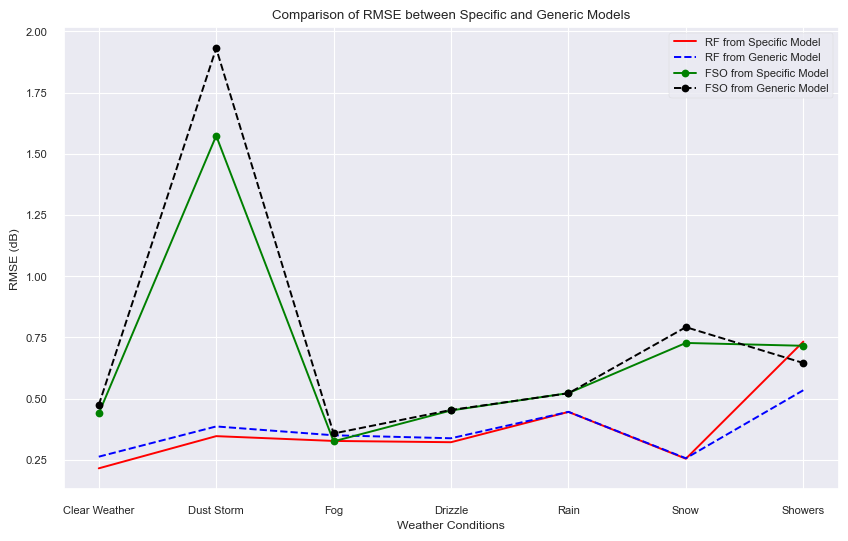

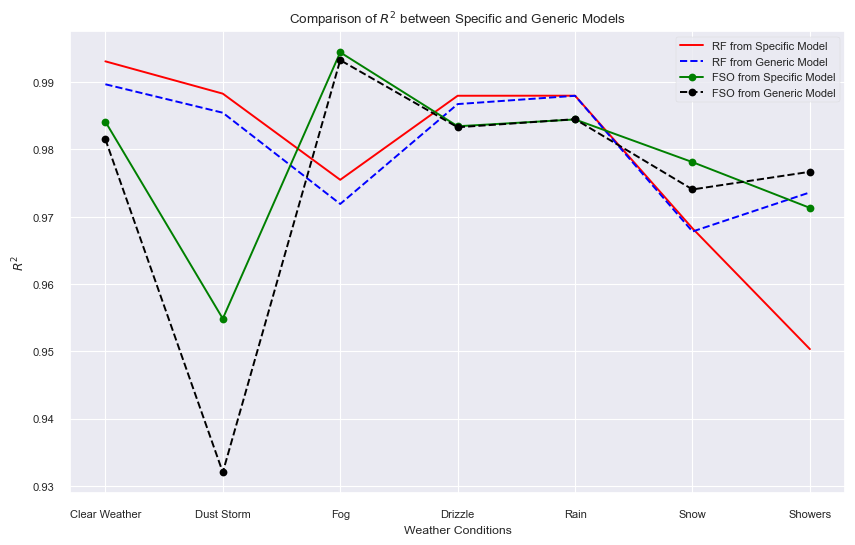

In [21]:
# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(weather_conditions, rf_specific_rmse, 'x-', color='red', label="RF from Specific Model")
plt.plot(weather_conditions, rf_generic_rmse_SC, 'x--', color='blue', label="RF from Generic Model")
plt.plot(weather_conditions, fso_specific_rmse, 'o-', color='green', label="FSO from Specific Model")
plt.plot(weather_conditions, fso_generic_rmse_SC, 'o--', color='black', label="FSO from Generic Model")
plt.xlabel("Weather Conditions")
plt.ylabel("RMSE (dB)")
plt.title("Comparison of RMSE between Specific and Generic Models")
plt.legend()
plt.grid(True)
plt.savefig(f'Figure/eps/Evaluation/Compare_RMSE_randomforest.eps', format='eps')
plt.show()

# Plot R²
plt.figure(figsize=(10, 6))
plt.plot(weather_conditions, rf_specific_r2, 'x-', color='red', label="RF from Specific Model")
plt.plot(weather_conditions, rf_generic_r2_SC, 'x--', color='blue', label="RF from Generic Model")
plt.plot(weather_conditions, fso_specific_r2, 'o-', color='green', label="FSO from Specific Model")
plt.plot(weather_conditions, fso_generic_r2_SC, 'o--', color='black', label="FSO from Generic Model")
plt.xlabel("Weather Conditions")
plt.ylabel(r"$R^2$")
plt.title("Comparison of $R^2$ between Specific and Generic Models")
plt.legend()
plt.grid(True)
plt.savefig(f'Figure/eps/Evaluation/Compare_R2_randomforest.eps', format='eps')
plt.show()

**Saving the Best Generic Models for FSO and RF Attenuation**

In [25]:
import joblib

joblib.dump(generic_fso_model, f"saved_models/generic_fso_best_model")
joblib.dump(generic_rf_model, f"saved_models/generic_rf_best_model")

['saved_models/generic_rf_best_model']

In [28]:
# Summary of model results
print("Summary of Model Performance on Validation sets:")
print(f"The RMSE of the best Generic model for FSO attenuation is: {fso_generic_rmse_ALL[0]:.4f}")
print(f"The RMSE of the best Generic model for RF attenuation is: {rf_generic_rmse_ALL[0]:.4f}")
print(f"The R² of the best Generic model for FSO attenuation is: {fso_generic_r2_ALL[0]:.4f}")
print(f"The R² of the best Generic model for RF attenuation is: {rf_generic_r2_ALL[0]:.4f}")

Summary of Model Performance on Validation sets:
The RMSE of the best Generic model for FSO attenuation is: 0.5000
The RMSE of the best Generic model for RF attenuation is: 0.3369
The R² of the best Generic model for FSO attenuation is: 0.9830
The R² of the best Generic model for RF attenuation is: 0.9906
